In [1]:
import numpy as np
import hdbscan
from sklearn.cluster import AffinityPropagation, DBSCAN, KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import MDS
from collections import Counter
import matplotlib.pyplot as plt

# MDS

c:\Users\heigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


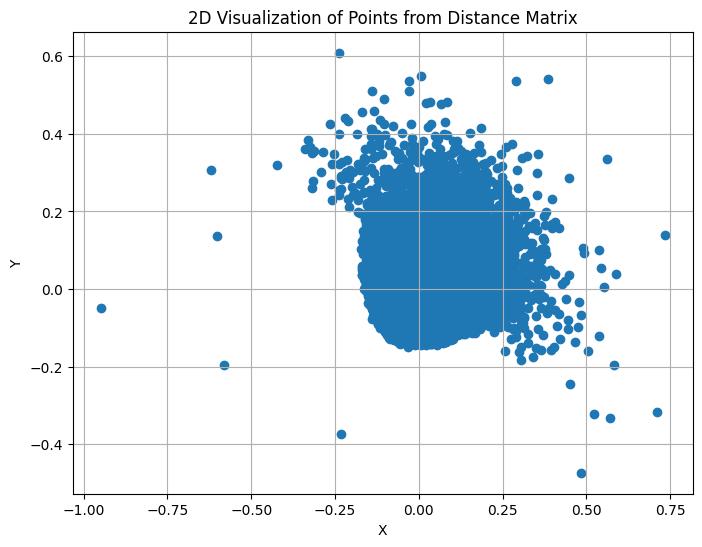

In [3]:
distance_matrix = np.load('concatenated_matrix_complete.npy')
distance_matrix /= distance_matrix.max()

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
points_2d = mds.fit_transform(distance_matrix)

plt.figure(figsize=(8, 6))

x = points_2d[:, 0]
y = points_2d[:, 1]

plt.scatter(x, y)

plt.xlabel('X')
plt.ylabel('Y')

plt.title('2D Visualization of Points from Distance Matrix')
plt.grid(True)
plt.show()


## Affinity Propagation

In [3]:
points_2d = np.load('points_2d.npy')
distance_matrix = np.load('concatenated_matrix_complete.npy')
distance_matrix /= 1000
similarity_matrix = 1 / (1 + distance_matrix)

affinity_propagation = AffinityPropagation(affinity='precomputed', preference= 1,  max_iter=1000, random_state=42, convergence_iter=20)
affinity_propagation.fit(similarity_matrix)

cluster_labels = affinity_propagation.labels_
exemplars = affinity_propagation.cluster_centers_indices_
cluster_counts = Counter(cluster_labels)
sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

with open('Cluster/ap_cluster_info.txt', 'w') as file:
    file.write("Number of elements per cluster (sorted in descending order):\n")
    for cluster, count in sorted_clusters:
        exemplar_index = exemplars[cluster]
        exemplar = f"Exemplar: {exemplar_index}" if exemplar_index != -1 else "No exemplar"
        file.write(f"Cluster {cluster}: {count} elements, {exemplar}\n")

plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_points = points_2d[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.title('Affinity Propagation Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


## DBScan

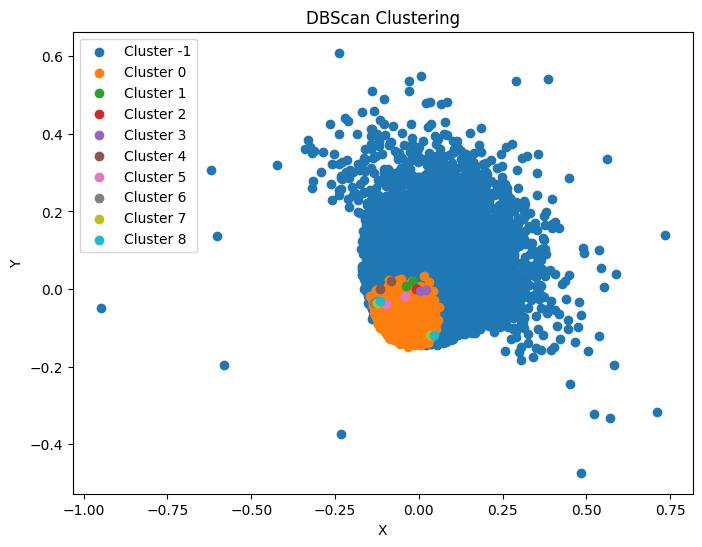

In [2]:
points_2d = np.load('points_2d.npy')
similarity_matrix = np.load('concatenated_matrix_complete.npy')

similarity_matrix /= similarity_matrix.max()

eps = 0.1 
min_samples = 2 
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
dbscan.fit(similarity_matrix)

cluster_labels = dbscan.labels_
core_samples_mask = np.zeros_like(cluster_labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

cluster_counts = Counter(cluster_labels)

sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

with open('Cluster/dbscan_cluster_info.txt', 'w') as file:
    file.write("Number of elements per cluster (sorted in descending order):\n")
    for cluster, count in sorted_clusters:
        file.write(f"Cluster {cluster}: {count} elements\n")

plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_points = points_2d[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.title('DBScan Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [13]:
import chess.pgn

# Read the PGN file
pgn_file = "FilteredGames_2600.pgn"
output_pgn_file = "clustered.pgn"
indices = np.where(cluster_labels == 0)[0]

# Function to filter games based on indices
def filter_games(pgn, indices):
    filtered_games = []
    index = 0
    while True:
        game = chess.pgn.read_game(pgn)
        
        if index in indices:
            filtered_games.append(game)
        index += 1

        if index == 10000:
            break
        
    return filtered_games

# Function to write filtered games to a new PGN file
def write_filtered_games(filtered_games, output_file):
    with open(output_file, "w") as f:
        for game in filtered_games:
            f.write(str(game) + "\n\n")

# Main program
with open(pgn_file) as pgn:
    filtered_games = filter_games(pgn, indices)
    write_filtered_games(filtered_games, output_pgn_file)


## HDBScan

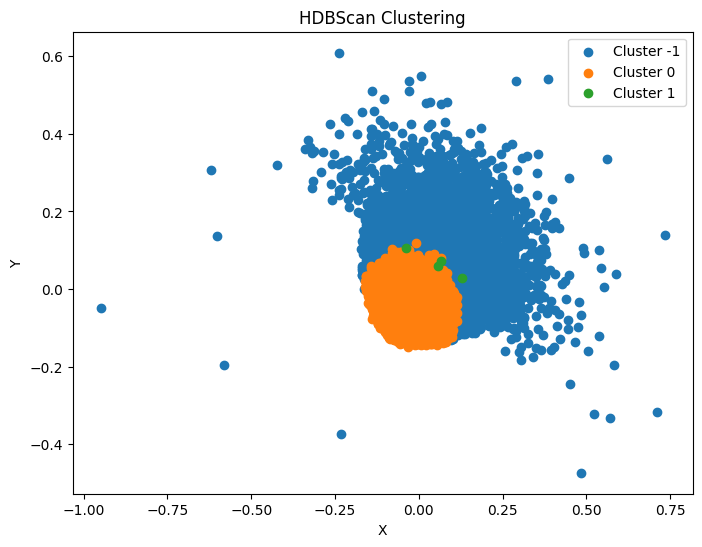

In [2]:
points_2d = np.load('points_2d.npy')
similarity_matrix = np.load('concatenated_matrix_complete.npy')

similarity_matrix /= similarity_matrix.max()

min_cluster_size = 4
min_samples = 2  

clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, metric='precomputed')
clusterer.fit(similarity_matrix)

cluster_labels = clusterer.labels_
core_samples_mask = (cluster_labels != -1)
cluster_counts = Counter(cluster_labels)
sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

with open('Cluster/hdbscan_cluster_info.txt', 'w') as file:
    file.write("Number of elements per cluster (sorted in descending order):\n")
    for cluster, count in sorted_clusters:
        file.write(f"Cluster {cluster}: {count} elements\n")

plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_points = points_2d[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.title('HDBScan Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# KMeans

For n_clusters = 5, the average silhouette_score is : 0.5260026209468046
For n_clusters = 6, the average silhouette_score is : 0.4765624431697707
For n_clusters = 7, the average silhouette_score is : 0.4522843121561514


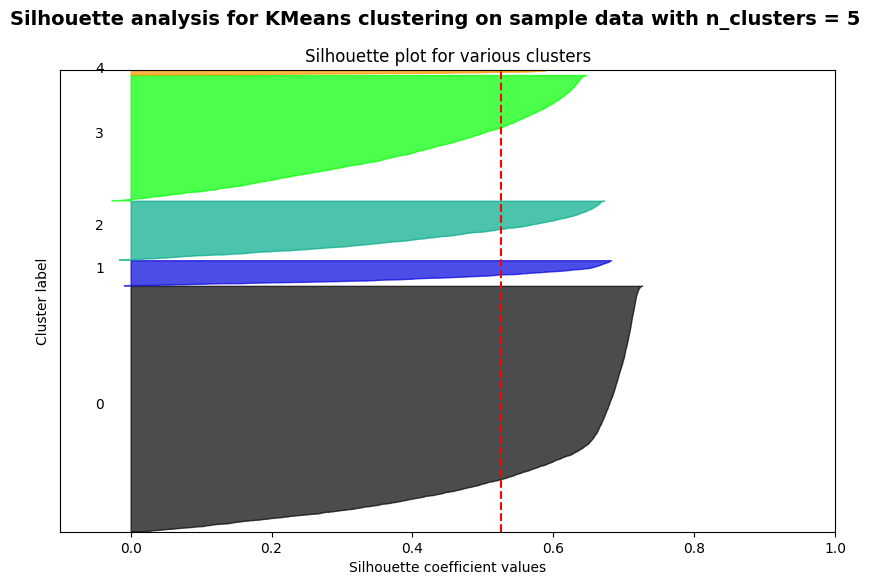

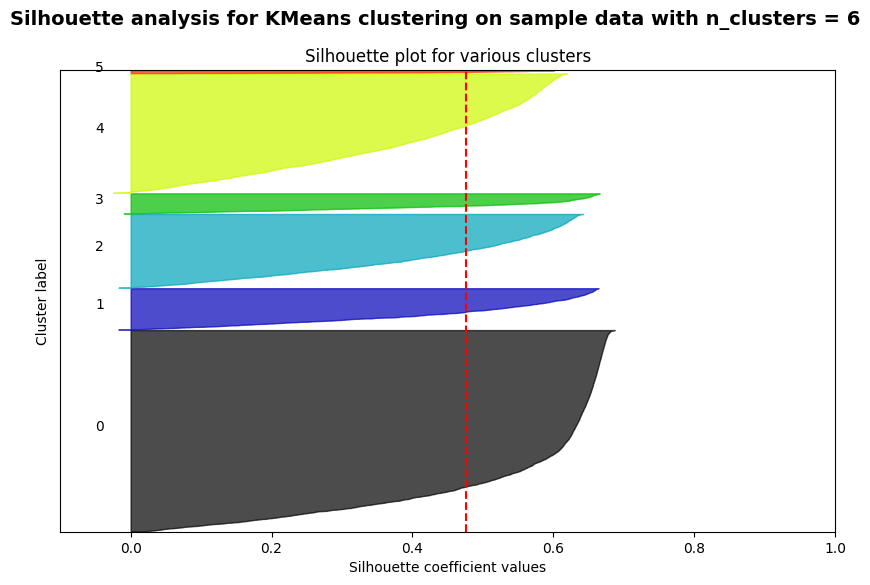

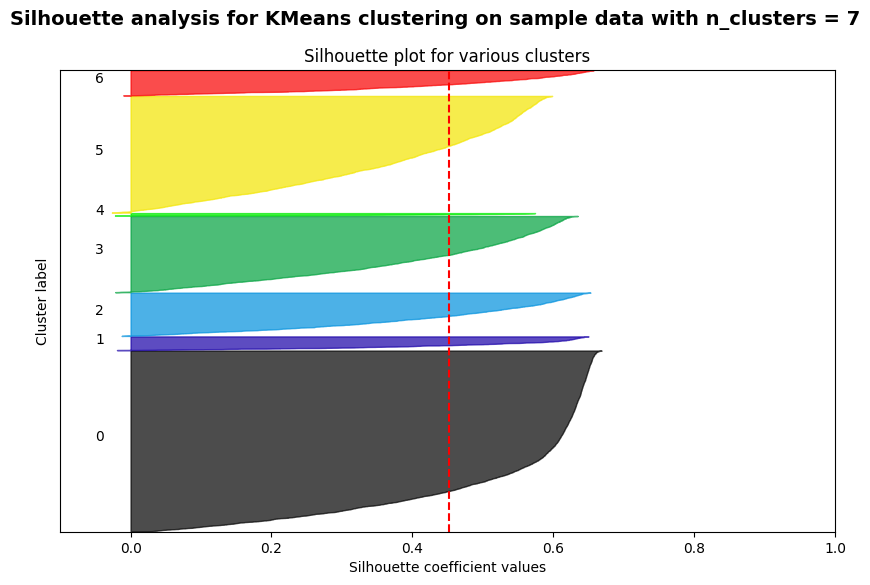

In [2]:
similarity_matrix = np.load('concatenated_matrix_complete.npy')

similarity_matrix /= similarity_matrix.max()

k_values = range(5, 8) 

for n_clusters in k_values:

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)


    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(similarity_matrix) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(similarity_matrix)


    silhouette_avg = silhouette_score(similarity_matrix, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


    sample_silhouette_values = silhouette_samples(similarity_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")

plt.show()


c:\Users\heigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


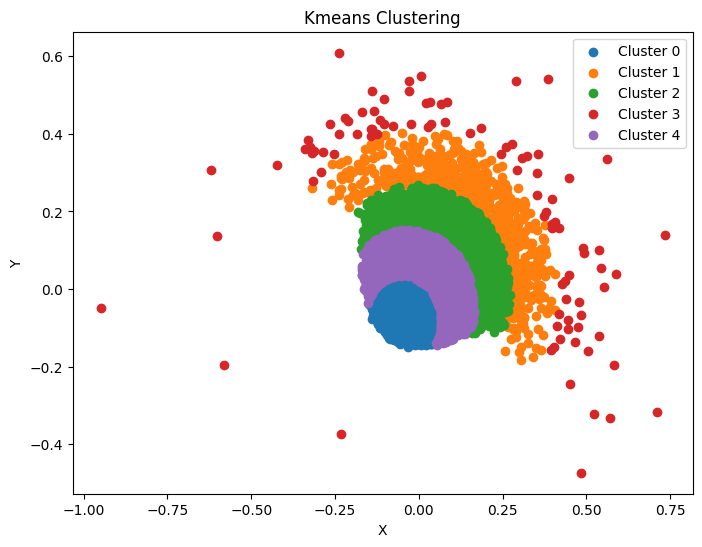

In [3]:
points_2d = np.load('points_2d.npy')
similarity_matrix = np.load('concatenated_matrix_complete.npy')
similarity_matrix /= similarity_matrix.max()

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(similarity_matrix)

cluster_labels = kmeans.labels_
core_samples_mask = np.ones_like(cluster_labels, dtype=bool)

cluster_counts = Counter(cluster_labels)

sorted_clusters = sorted(cluster_counts.items(), key=lambda x: x[1], reverse=True)

with open('Cluster/kmeans_cluster_info.txt', 'w') as file:
    file.write("Number of elements per cluster (sorted in descending order):\n")
    for cluster, count in sorted_clusters:
        file.write(f"Cluster {cluster}: {count} elements\n")

plt.figure(figsize=(8, 6))
for cluster_label in np.unique(cluster_labels):
    cluster_points = points_2d[cluster_labels == cluster_label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_label}')

plt.title('Kmeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()